In [1]:
import os
import sys
import numpy as np
import seaborn as sns
from IPython.display import display
from PIL import Image
from tqdm.notebook import tqdm

sns.reset_orig()
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
os.chdir('..')

In [2]:
from catalogue import get_catalogue
jname = 'J1622-4950'

outdir = f'output/outdir_{jname}'
catalogue = get_catalogue(outdir=outdir)

# Levin et al. (2010)
X =    [1400.0, 3100.0, 5500.0, 6300.0, 9000.0] # MHz
Y =    [   4.8,    4.9,   13.0,   12.0,   14.3] # mJy
YERR = [   2.8,    2.5,    1.0,    2.0,    0.8] # mJy
catalogue.extend(jname, X, Y, YERR, ['Levin_2010']*5)
catalogue.add_citations({'Levin_2010': 'Levin et al. (2010)'})

# Anderson et al. (2012)
X =    [4800.0, 5312.0, 8256.0, 8767.0] # MHz
Y =    [  40.4,   33.0,   31.9,   30.9] # mJy
YERR = [   0.3,    0.3,    0.6,    0.6] # mJy
catalogue.extend(jname, X, Y, YERR, ['Anderson_2012']*4)
catalogue.add_citations({'Anderson_2012': 'Anderson et al. (2012)'})

pulsar = catalogue.get_pulsar(jname)
print(pulsar)

J1622-4950: 19 measurements
X = [17000.0, 24000.0, 943.0, 1039.0, 1133.0, 1228.0, 1337.0, 1429.0, 1515.0, 1632.0, 1400.0, 3100.0, 5500.0, 6300.0, 9000.0, 4800.0, 5312.0, 8256.0, 8767.0] MHz
Y = [8.0, 5.6, 18.1639, 19.946, 21.0574, 16.8998, 19.0706, 18.1946, 16.9217, 16.1941, 4.8, 4.9, 13.0, 12.0, 14.3, 40.4, 33.0, 31.9, 30.9] mJy
YERR = [1.6, 1.12, 0.174, 0.1385, 0.1398, 0.1702, 0.0993, 0.0837, 0.0955, 0.0905, 2.8, 2.5, 1.0, 2.0, 0.8, 0.3, 0.3, 0.6, 0.6] mJy
REF = [Keith_2011, Keith_2011, Posselt_2023, Posselt_2023, Posselt_2023, Posselt_2023, Posselt_2023, Posselt_2023, Posselt_2023, Posselt_2023, Levin_2010, Levin_2010, Levin_2010, Levin_2010, Levin_2010, Anderson_2012, Anderson_2012, Anderson_2012, Anderson_2012]
v0 = 4757.310164368098 MHz


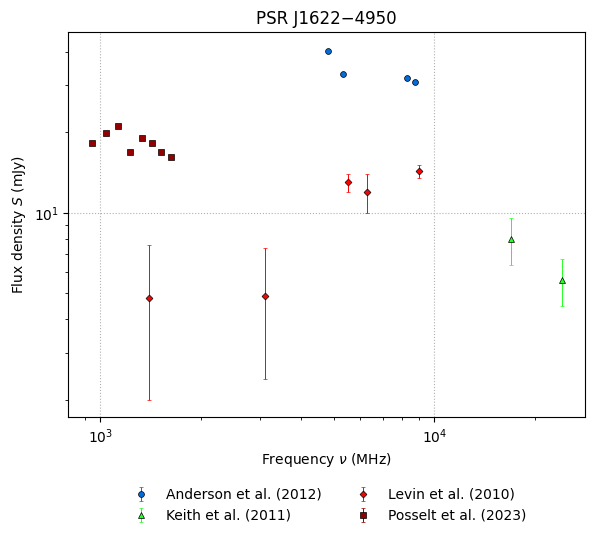

In [3]:
from plots import plot_raw
plot_raw(pulsar, catalogue.citation_dict, outpath=f'notebooks/{jname}_raw.pdf')

In [4]:
# remove Posselt_2023 and Anderson_2012
pulsar_2 = pulsar.copy()
for ref in ['Posselt_2023', 'Anderson_2012']:
    idx = np.where(np.array(pulsar_2.REF) == ref)[0]
    pulsar_2.X = np.delete(pulsar_2.X, idx)
    pulsar_2.Y = np.delete(pulsar_2.Y, idx)
    pulsar_2.YERR = np.delete(pulsar_2.YERR, idx)
    pulsar_2.REF = np.delete(pulsar_2.REF, idx)
print(pulsar_2)

J1622-4950: 7 measurements
X = [17000.0, 24000.0, 1400.0, 3100.0, 5500.0, 6300.0, 9000.0] MHz
Y = [8.0, 5.6, 4.8, 4.9, 13.0, 12.0, 14.3] mJy
YERR = [1.6, 1.12, 2.8, 2.5, 1.0, 2.0, 0.8] mJy
REF = [Keith_2011, Keith_2011, Levin_2010, Levin_2010, Levin_2010, Levin_2010, Levin_2010]
v0 = 4757.310164368098 MHz


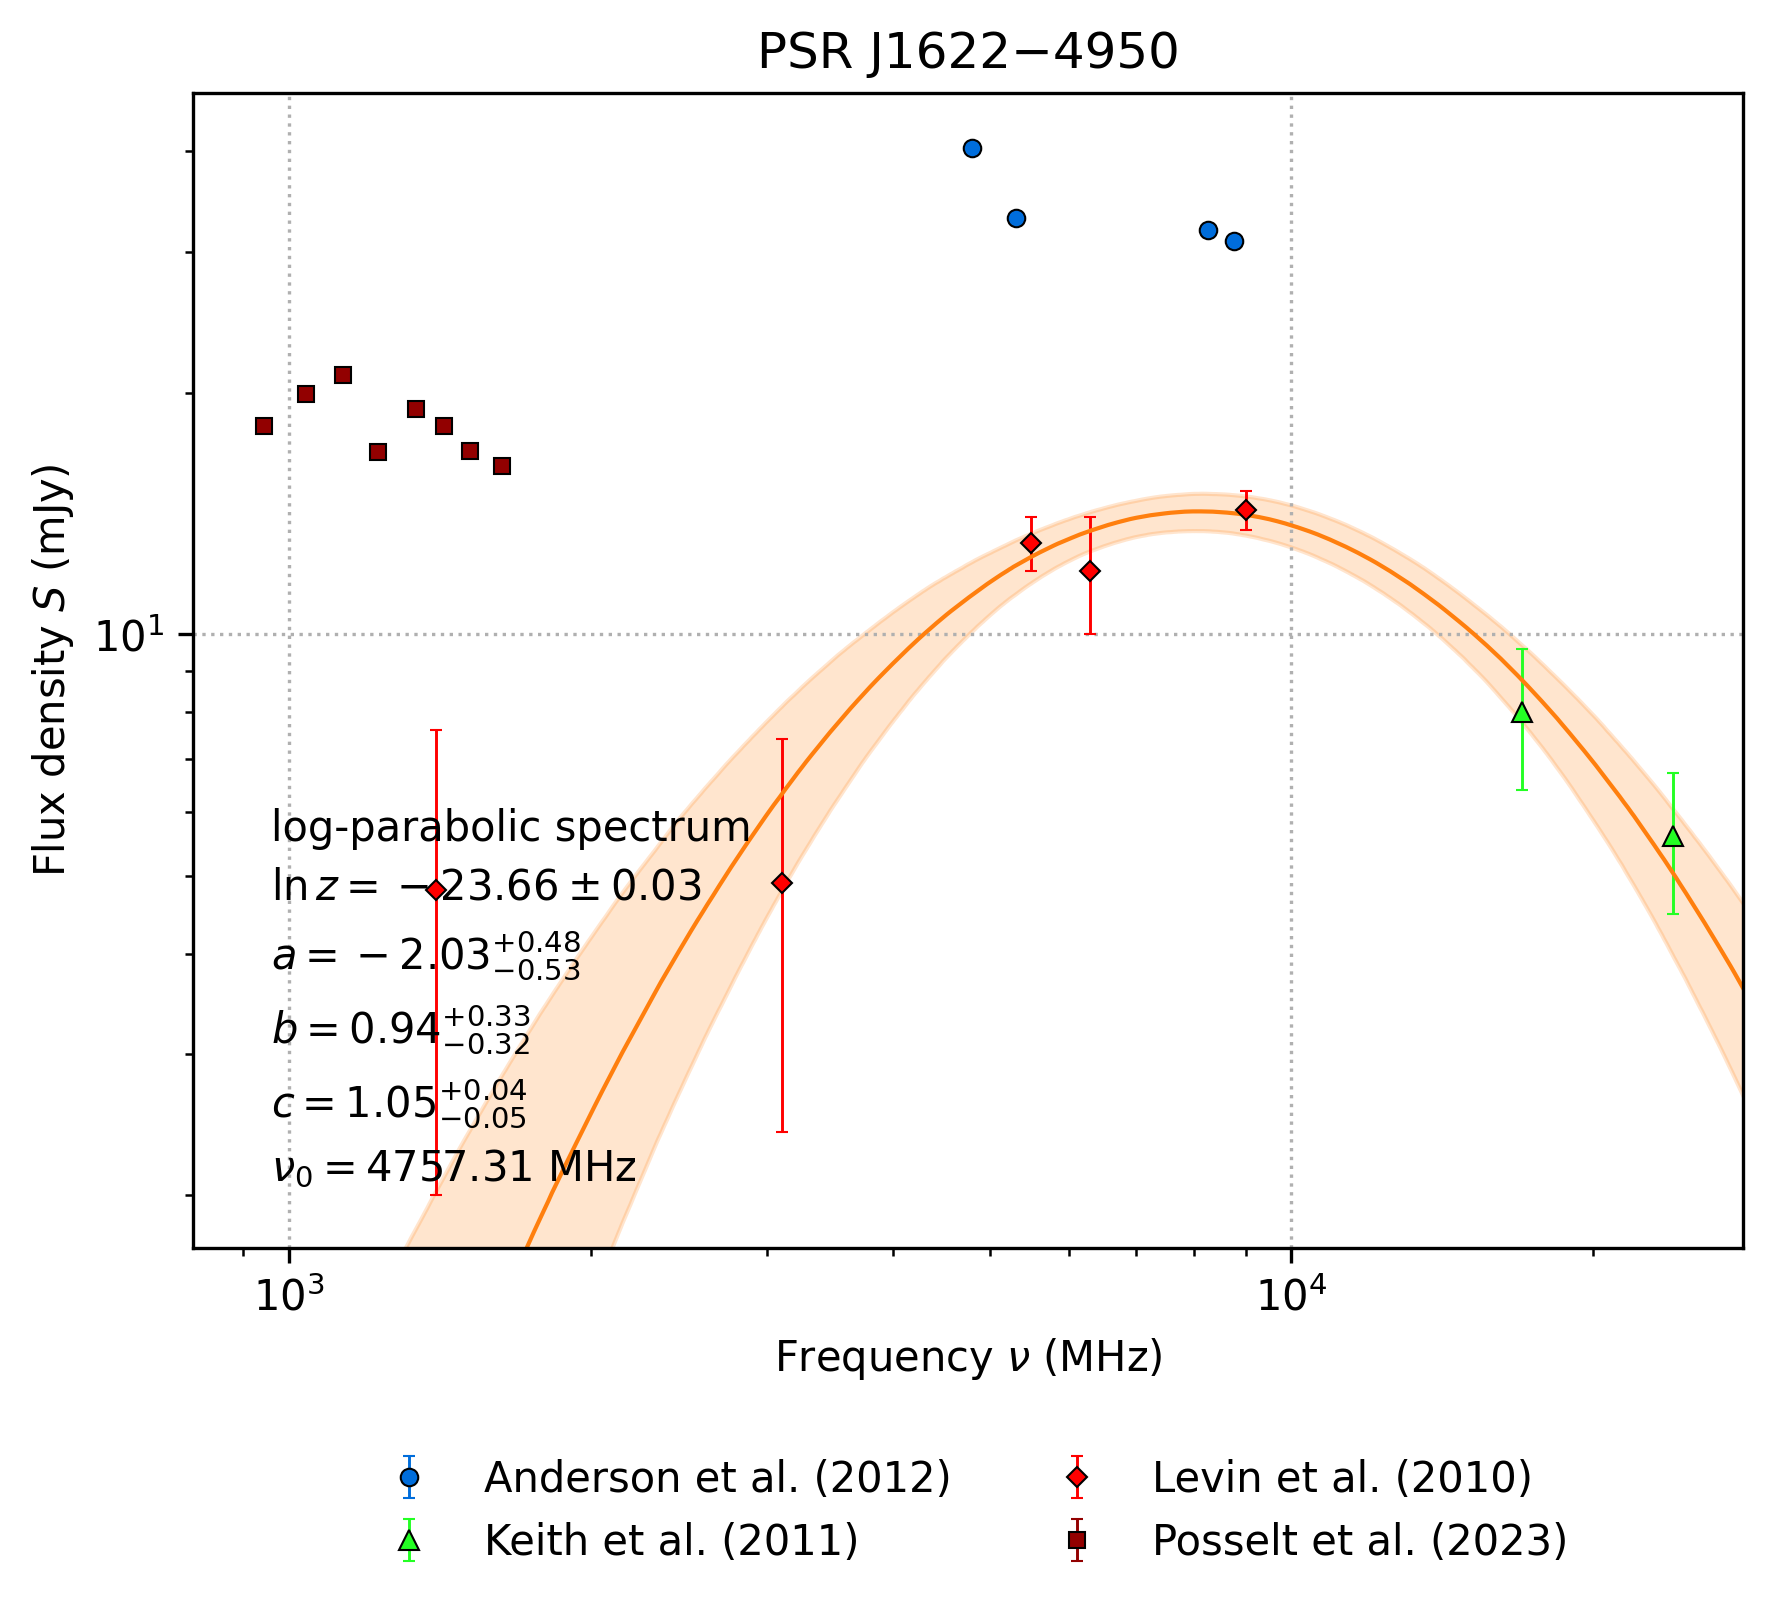

In [5]:
from fit import fit
from env import fit_only_env
from models import get_models
model_name = 'log_parabolic_spectrum'
fit(jname, model_name, fit_only_env(outdir, get_models(model_name), catalogue, override=True), dataset=pulsar_2, dataset_plot=pulsar)
display(Image.open(f'{outdir}/{jname}/{model_name}_result.png'))